# Sort model matches

## Imports

In [1]:
import sys
import os
import pprint
import parse
import shutil
import numpy as np
import matplotlib.pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.utils.makedir import mkdir_p
from gleam.utils.encode import an_sort
from mcmc_eval import read_mcmctxt
from match_eval import read_matchlog

In [6]:
# Parameter settings
ids = ['SDSSJ0029-0055', 'SDSSJ0737+3216', 'SDSSJ0753+3416', 'SDSSJ0956+5100',
       'SDSSJ1051+4439', 'SDSSJ1430+6104', 'SDSSJ1627-0053']

chi2_mcmc = {}
chi2_match = {}

for lens in ids:
    mdir = 'match_plots/{lens}/'.format(lens=lens)
    mcmcmdl_range, chi2_ini, mcmcangles = read_mcmctxt('mcmc/mcmceval_{}.txt'.format(lens))
    matchlog = '{}{}_matching.log'.format(mdir, lens)
    matchmdl_range, chi2_psf, matchangles = read_matchlog(matchlog)
    chi2_mcmc[lens] = chi2_ini.copy()
    chi2_match[lens] = chi2_psf.copy()

idx = 0
lens = ids[idx]              # lens name


In [3]:
# np.exp(-chi2_mcmc[ids[idx]])
np.sort(2*np.exp(chi2_match[ids[idx]]))

array([4.17138110e+00, 4.26843471e+00, 4.27355990e+00, 4.33901420e+00,
       4.39007882e+00, 4.43686116e+00, 4.45910102e+00, 4.53192675e+00,
       4.69288335e+00, 4.69382202e+00, 4.74906226e+00, 4.82324617e+00,
       4.84790756e+00, 4.94336948e+00, 4.96169383e+00, 4.96417530e+00,
       4.96864507e+00, 5.02913087e+00, 5.08018247e+00, 5.09493638e+00,
       5.16625048e+00, 5.18799437e+00, 5.25325130e+00, 5.28645126e+00,
       5.33691185e+00, 5.37870253e+00, 5.37977838e+00, 5.41215408e+00,
       5.42136257e+00, 5.42461636e+00, 5.48132676e+00, 5.57307619e+00,
       5.67089629e+00, 5.71415929e+00, 5.75142230e+00, 5.82085513e+00,
       5.82784435e+00, 5.86408923e+00, 5.86760874e+00, 5.87054327e+00,
       5.88288437e+00, 5.89937953e+00, 5.91769598e+00, 5.92065557e+00,
       6.01915678e+00, 6.02879514e+00, 6.04449041e+00, 6.07296638e+00,
       6.09304027e+00, 6.10096637e+00, 6.13890987e+00, 6.14075182e+00,
       6.14136592e+00, 6.17585405e+00, 6.19379002e+00, 6.20246740e+00,
      

189
0
180
3
8
7
67


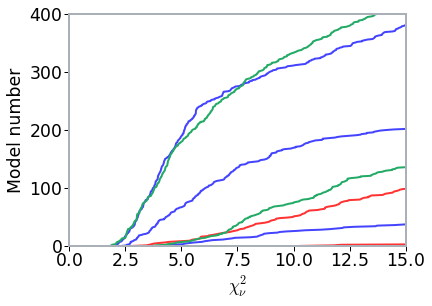

In [4]:
for idx in range(7):
    # chi2_dist = 2*np.exp(-chi2_mcmc[ids[idx]])
    chi2_dist = np.sort(np.exp(chi2_match[ids[idx]]))

    thresh = np.argmin(np.abs(chi2_dist - 5))
    print(thresh)
    # plt.axhline(thresh, color='tab:blue', alpha=0.4, ls='--', lw=1)
    plt.plot(chi2_dist, range(len(chi2_dist)), lw=2)
    # plt.plot(np.cumsum(chi2_dist), color='tab:blue', lw=2)

plt.xlim(0, 15)
plt.ylim(0, 400)
plt.ylabel('Model number')
plt.xlabel(r'$\chi^{2}_{\nu}$')
plt.show()

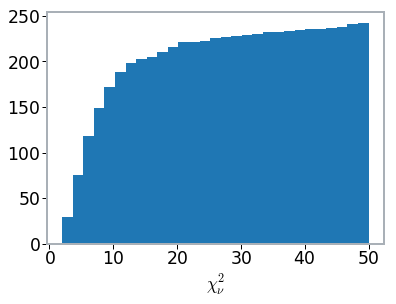

In [5]:
plt.hist(chi2_dist, bins=np.linspace(2, 50, 30), cumulative=True, color='tab:blue')
plt.xlabel(r'$\chi^{2}_{\nu}$')
plt.show()